In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)






Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Model 1 :** Three Layer Achitecture with 3*3 kernels, maxpooling and No-dropout

In [0]:
model1 = Sequential()

#Level 1
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


#Level2
model1.add(Conv2D(64, (3, 3), activation='relu'))
#Batch Normalizing the metrix
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))



#Level3
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))



model1.add(Flatten())
model1.add(Dense(128, activation='relu'))

model1.add(Dense(num_classes, activation='softmax'))


#Compile
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#run
loss=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1266 - acc: 0.9621 - val_loss: 0.0466 - val_acc: 0.9867
Epoch 2/8
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.1316 - val_acc: 0.9596
Epoch 3/8
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0492 - val_acc: 0.9858
Epoch 4/8
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0195 - acc: 0.9939 - val_loss: 0.0705 - val_acc: 0.9795
Epoch 5/8
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0126 - acc: 0.9958 - val_loss: 0.0264 - val_acc: 0.9921
Epoch 6/8
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0094 - acc: 0.9971 - val_loss: 0.0286 - val_acc: 0.9926
Epoch 7/8
60000/60

In [0]:
#copied from previous assignment

%matplotlib inline
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    #plt.show()
    fig.canvas.draw()

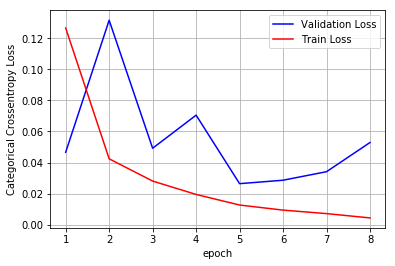

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = loss.history['val_loss']
ty = loss.history['loss']
plt_dynamic(x, vy, ty, ax)

**Model2** : Four Layer Architecture with 5*5 kernels,maxpooling,BatchNormalization and dropout

In [0]:
model2=Sequential()

#droput rate
P=0.4

#Level 1
model2.add(Conv2D(32,kernel_size=(5,5),padding="same",activation='relu',input_shape=input_shape))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(P))

#Level 2
model2.add(Conv2D(64, (5, 5),padding="same", activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(P))

#Level 3
model2.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(P))

#Level 4
model2.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(P))



## Flatten 
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

## Output layer
model2.add(Dense(num_classes, activation='softmax'))

## Model compile
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
## Model fit
loss=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 1590s 26ms/step - loss: 0.2182 - acc: 0.9341 - val_loss: 0.0562 - val_acc: 0.9833
Epoch 2/8
60000/60000 [==============================] - 1527s 25ms/step - loss: 0.0595 - acc: 0.9820 - val_loss: 0.0453 - val_acc: 0.9840
Epoch 3/8
60000/60000 [==============================] - 1502s 25ms/step - loss: 0.0430 - acc: 0.9871 - val_loss: 0.0543 - val_acc: 0.9833
Epoch 4/8
60000/60000 [==============================] - 1493s 25ms/step - loss: 0.0379 - acc: 0.9881 - val_loss: 0.0169 - val_acc: 0.9948
Epoch 5/8
60000/60000 [==============================] - 1480s 25ms/step - loss: 0.0322 - acc: 0.9897 - val_loss: 0.0246 - val_acc: 0.9927
Epoch 6/8
60000/60000 [==============================] - 1485s 25ms/step - loss: 0.0287 - acc: 0.9909 - val_loss: 0.0307 - val_acc: 0.9913
Epoch 7/8
60000/60000 [==============================] - 1503s 25ms/step - loss: 0.0253 - acc: 0.9920 - val_loss: 0.

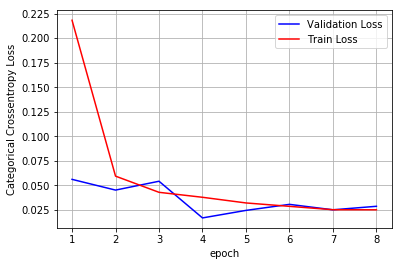

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,epochs+1))
vy = loss.history['val_loss']
ty = loss.history['loss']
plt_dynamic(x, vy, ty, ax)

**Model 3:**6 Layer Architecture with 7*7 kernels with Batch-Normalization and dropout

In [0]:
model3=Sequential()

#droput rate
P=0.3

##Level 1
model3.add(Conv2D(32,kernel_size=(7,7),padding="same",activation='relu',input_shape=input_shape))
model3.add(Conv2D(128, (7, 7), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))

##Level 2
model3.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))

##Level 3
model3.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))

##Level 4
model3.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))

##Level 5
model3.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))

##Level 6
model3.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(P))
           
           
           
           
## Flatten 
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))

## Output layer
model3.add(Dense(num_classes, activation='softmax'))

## Model compile
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
## Model fit
loss=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 11815s 197ms/step - loss: 0.1944 - acc: 0.9477 - val_loss: 0.1498 - val_acc: 0.9668
Epoch 2/4
60000/60000 [==============================] - 11727s 195ms/step - loss: 0.0705 - acc: 0.9813 - val_loss: 0.0853 - val_acc: 0.9802
Epoch 3/4
60000/60000 [==============================] - 11710s 195ms/step - loss: 0.0509 - acc: 0.9857 - val_loss: 0.0389 - val_acc: 0.9913
Epoch 4/4
38400/60000 [==================>...........] - ETA: 1:07:42 - loss: 0.0356 - acc: 0.9897

Model 4 :4 Layer Architecture with 5*5 kernels with Batch-Normalization,maxpooling and dropout

In [0]:
model4=Sequential()

#droput rate
P=0.4

#Level 1
model4.add(Conv2D(32,kernel_size=(5,5),padding="same",activation='relu',input_shape=input_shape))
model4.add(Conv2D(64, (5, 5), activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(P))

#Level 2
model4.add(Conv2D(64, (5, 5),padding="same", activation='relu'))
model4.add(BatchNormalization())
#model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(P))

#Level 3
model4.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(P))

#Level 4
model4.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model4.add(BatchNormalization())
#model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(P))



## Flatten 
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))

## Output layer
model4.add(Dense(num_classes, activation='softmax'))

## Model compile
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
## Model fit
loss=model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 2630s 44ms/step - loss: 0.1648 - acc: 0.9533 - val_loss: 0.0624 - val_acc: 0.9823
Epoch 2/4
60000/60000 [==============================] - 2835s 47ms/step - loss: 0.0578 - acc: 0.9842 - val_loss: 0.0502 - val_acc: 0.9875
Epoch 3/4
60000/60000 [==============================] - 3062s 51ms/step - loss: 0.0421 - acc: 0.9877 - val_loss: 0.0377 - val_acc: 0.9881
Epoch 4/4
60000/60000 [==============================] - 3098s 52ms/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.0390 - val_acc: 0.9906
Test loss: 0.039029028620755614
Test accuracy: 0.9906


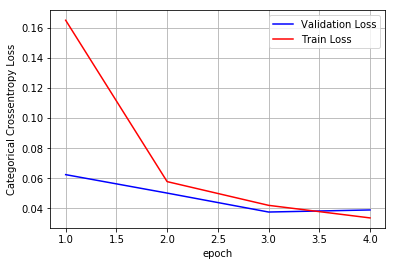

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = loss.history['val_loss']
ty = loss.history['loss']
plt_dynamic(x, vy, ty, ax)

**Summary** :

In [2]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model No.","Architecture","Epochs","Dropout rate","Kernel size","Maxpooling-kernel","Optimizer","Test Loss","Test Accuracy"]

x.add_row(["Model 1","3 Layer","12", "No dropout","3*3","2*2","Adadelta",0.0529,0.9867])

x.add_row(["Model 2","4 Layer","12", "0.2","5*5",'2*2',"Adam",0.0287,0.9914])
x.add_row(["Model 4","4 Layer","8", "0.2","5*5",'No Maxpooling',"Adam",0.0391,0.9906])

x.add_row(["Model 3","7 Layer","4", "0.2","7*7",'2*2',"Adam",0.0351,0.9933])


print(x)

+-----------+--------------+--------+--------------+-------------+-------------------+-----------+-----------+---------------+
| Model No. | Architecture | Epochs | Dropout rate | Kernel size | Maxpooling-kernel | Optimizer | Test Loss | Test Accuracy |
+-----------+--------------+--------+--------------+-------------+-------------------+-----------+-----------+---------------+
|  Model 1  |   3 Layer    |   12   |  No dropout  |     3*3     |        2*2        |  Adadelta |   0.0529  |     0.9867    |
|  Model 2  |   4 Layer    |   12   |     0.2      |     5*5     |        2*2        |    Adam   |   0.0287  |     0.9914    |
|  Model 4  |   4 Layer    |   8    |     0.2      |     5*5     |   No Maxpooling   |    Adam   |   0.0391  |     0.9906    |
|  Model 3  |   7 Layer    |   4    |     0.2      |     7*7     |        2*2        |    Adam   |   0.0351  |     0.9933    |
+-----------+--------------+--------+--------------+-------------+-------------------+-----------+-----------+-

**Observation:**

1.With introducing the dropout and maxpooling we can see the significant improvement in accuracy.




2.As the number of layers increase the model start to overfit, even in 4 epochs Model3 has achived very high accuracy.